# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [1]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Leer conjunto de datos y primer vistazo

In [2]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos

In [3]:
# Información sobre el tipo de datos de cada feature.
print("\nInformación del dataset:")
data.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14

## 📝 Descripción del conjunto de datos

Este conjunto de datos contiene **8124 instancias** de diferentes tipos de hongos, clasificados como:

- `e`: comestibles (*edible*)
- `p`: venenosos (*poisonous*)

Cada instancia representa un hongo y tiene **22 atributos categóricos**, como:

- Forma, superficie y color del sombrero (`cap-shape`, `cap-surface`, `cap-color`)
- Presencia de magulladuras (`bruises`)
- Olor (`odor`)
- Características de las láminas (`gill-attachment`, `gill-spacing`, `gill-size`, `gill-color`)
- Forma y raíz del tallo (`stalk-shape`, `stalk-root`)
- Colores y superficies del tallo (`stalk-color-above-ring`, `stalk-surface-below-ring`, etc.)
- Tipo y número de anillo (`ring-type`, `ring-number`)
- Color de impresión de esporas (`spore-print-color`)
- Hábitat y población (`habitat`, `population`)

> Todas las variables son categóricas.


#### Calcular el número de nulos de cada feature

In [4]:
# Igual que otras veces, una linea, contar los nulos por variable.
nulls = data.isnull().sum()
nulls

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [5]:
for col in data.columns:
    print(f"\n🔎 Columna: {col}")
    print(data[col].unique())




🔎 Columna: class
['p' 'e']

🔎 Columna: cap-shape
['x' 'b' 's' 'f' 'k' 'c']

🔎 Columna: cap-surface
['s' 'y' 'f' 'g']

🔎 Columna: cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']

🔎 Columna: bruises
['t' 'f']

🔎 Columna: odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']

🔎 Columna: gill-attachment
['f' 'a']

🔎 Columna: gill-spacing
['c' 'w']

🔎 Columna: gill-size
['n' 'b']

🔎 Columna: gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']

🔎 Columna: stalk-shape
['e' 't']

🔎 Columna: stalk-root
['e' 'c' 'b' 'r' '?']

🔎 Columna: stalk-surface-above-ring
['s' 'f' 'k' 'y']

🔎 Columna: stalk-surface-below-ring
['s' 'f' 'y' 'k']

🔎 Columna: stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']

🔎 Columna: stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']

🔎 Columna: veil-type
['p']

🔎 Columna: veil-color
['w' 'n' 'o' 'y']

🔎 Columna: ring-number
['o' 't' 'n']

🔎 Columna: ring-type
['p' 'e' 'l' 'f' 'n']

🔎 Columna: spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']



### Resumen valores extraños
La columna `stalk-root` tiene valores faltantes que fueron representados originalmente con `'?'

In [6]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
# Crear un nuevo DataFrame con el nombre de las columnas y sus valores únicos
n_values = pd.DataFrame({
    'feature': data.columns,
    'n_unique_values': [data[col].nunique() for col in data.columns]
})

# Mostrarlo
n_values


,feature,n_unique_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


from matplotlib import pyplot as plt
n_values['n_unique_values'].plot(kind='hist', bins=20, title='n_unique_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
n_values['n_unique_values'].plot(kind='line', figsize=(8, 4), title='n_unique_values')
plt.gca().spines[['top', 'right']].set_visible(False)

### 📊 Resumen de valores únicos por feature

Se creó un nuevo dataframe para mostrar, por cada variable (feature), la cantidad de valores únicos que contiene.

Esto permite:

- Detectar columnas sin variabilidad, como `veil-type`, que puede eliminarse.
- Identificar columnas con muchas categorías, que requerirán más atención al codificarlas (por ejemplo, `gill-color` o `cap-color`).

#### Tratar aquellos valores que entendamos que sean nulos


In [10]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.
# Imputar valores faltantes en 'stalk-root' con la moda

moda = data["stalk-root"].mode()[0]
data["stalk-root"] = data["stalk-root"].fillna(moda)

# Verificar que ya no hay nulos
data.isna().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [11]:
# Dejar por el camino si procede.
pd.DataFrame({
    'feature': data.columns,
    'n_unique_values': [data[col].nunique() for col in data.columns]
})

,feature,n_unique_values
0,class,2
1,cap-shape,6
2,cap-surface,4
3,cap-color,10
4,bruises,2
5,odor,9
6,gill-attachment,2
7,gill-spacing,2
8,gill-size,2
9,gill-color,12


from matplotlib import pyplot as plt
_df_0['n_unique_values'].plot(kind='hist', bins=20, title='n_unique_values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['n_unique_values'].plot(kind='line', figsize=(8, 4), title='n_unique_values')
plt.gca().spines[['top', 'right']].set_visible(False)

#### Separar entre variables predictoras y variables a predecir

In [12]:
# La variable que trata de predecir este conjunto de datos es 'class'.

# Variable objetivo
y = data["class"]

# Variables predictoras
X = data.drop(columns=["class"])

#### Codificar correctamente las variables categóricas a numéricas

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Usar sparse_output en lugar de sparse
encoder = OneHotEncoder(sparse_output=False)

# Aplicar el encoding
X_encoded = encoder.fit_transform(X)

# Ver forma
print("Nueva forma de X:", X_encoded.shape)

Nueva forma de X: (8124, 116)


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 116 entries, 0 to 115
dtypes: float64(116)
memory usage: 7.2 MB


### 🧠 One-Hot Encoding

Se aplicó One-Hot Encoding a las variables categóricas para convertirlas a formato numérico binario.

- El número original de columnas era: 22
- Tras codificar, el número total de columnas es: **116**
- Esto se debe a que cada categoría única genera una nueva columna binaria.



#### Train test split

In [31]:
# Os lo dejamos a todos igual
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 🧪 División de datos en entrenamiento y prueba

Se utilizó `train_test_split` para separar el dataset en conjuntos de entrenamiento y testeo.  
Esto permite entrenar los modelos con una parte de los datos y evaluarlos con otra que no han visto.

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

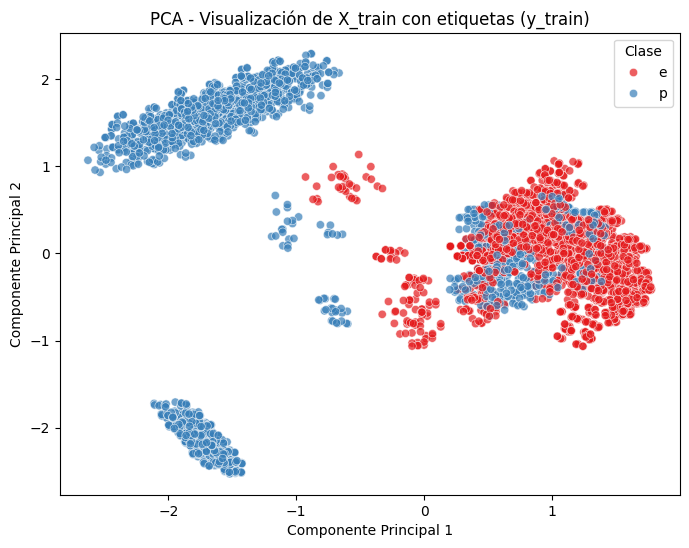

In [38]:
# Codificar todo el X primero
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Luego split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

# Y ahora sí:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Crear el gráfico scatter con las etiquetas de entrenamiento
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette="Set1", alpha=0.7)

plt.title("PCA - Visualización de X_train con etiquetas (y_train)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clase")
plt.show()

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predecir sobre el test set
y_pred = clf.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión en test: {accuracy:.4f}")

Precisión en test: 1.0000


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [44]:
X_train.shape

(5443, 116)

¿Muchas features no? Vamos a reducir las usando PCA.

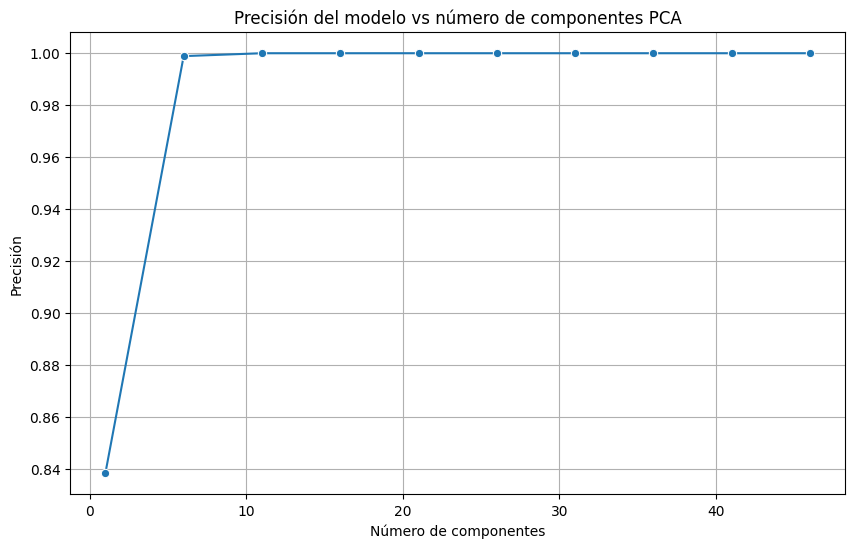

In [45]:
# Definir el rango de componentes PCA a probar
n_features = range(1, 50, 5)  # Probar 1, 6, 11, ..., 46 componentes
scores = []

for n in n_features:
    # 1. Aplicar PCA
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # 2. Entrenar Random Forest sobre los datos reducidos
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_pca, y_train)

    # 3. Predecir y calcular precisión
    y_pred = clf.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred)

    # 4. Guardar el score
    scores.append(score)

# Mostrar resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_features, y=scores, marker="o")
plt.title("Precisión del modelo vs número de componentes PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Precisión")
plt.grid(True)
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




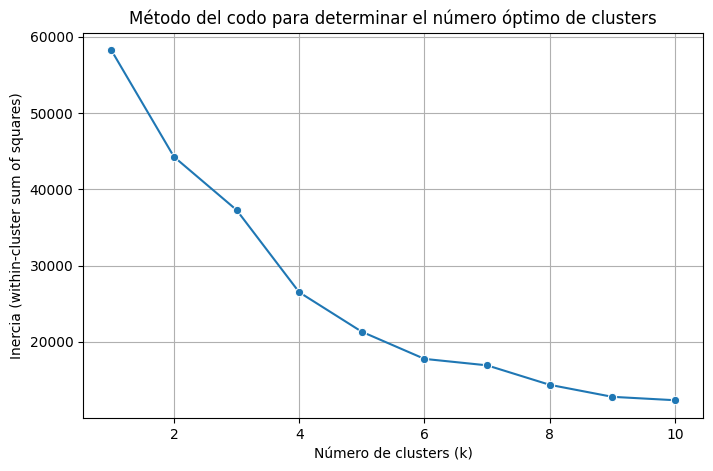

In [47]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_encoded)
scores = []
k_values = range(1, 11)  # Probar con k = 1 a 10

for k in k_values:
    # Definir y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)

    # Guardar la inercia (suma de distancias a los centroides)
    scores.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
sns.lineplot(x=k_values, y=scores, marker="o")
plt.title("Método del codo para determinar el número óptimo de clusters")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inercia (within-cluster sum of squares)")
plt.grid(True)
plt.show()

### 🧠 Interpretación técnica del número óptimo de clusters
la curva baja muy rápido de k=1 a k=3 o k=4:

🔻 De k=1 a k=2: gran mejora

🔻 De k=2 a k=3: mejora moderada

🔽 De k=3 a k=4: todavía baja bastante

⚠️ A partir de k=5, la mejora ya es mucho menor

El dataset contiene dos clases reales en la variable objetivo `class`:

- `e` → *edible* (comestible)
- `p` → *poisonous* (venenoso)

Aunque el algoritmo de KMeans realiza un agrupamiento no supervisado —es decir, **sin acceso a las etiquetas reales**—, observar que el valor óptimo de `k` se sitúa en `k = 2` sugiere que la **estructura interna de los datos coincide con la separación natural entre estas dos clases**.

> Esta coherencia entre los clusters generados y las clases verdaderas puede interpretarse como una validación indirecta de la separabilidad de las clases en el espacio de características.

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

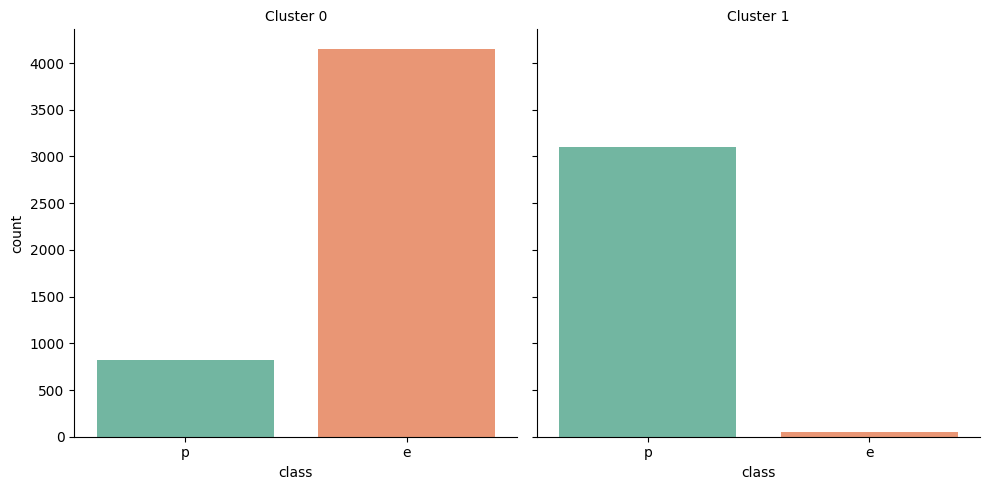

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Volver a generar el gráfico
ax = sns.catplot(
    col="cluster",
    x="class",
    hue="class",
    data=df_clusters,
    kind='count',
    col_wrap=2,
    palette="Set2"
)

ax.set_titles("Cluster {col_name}")
plt.show()



Vamos a ver qué tal queda esto pintado. Para ello, repetimos el

---

scatterplot de antes pero usando como color el cluster asignado por kmeans.

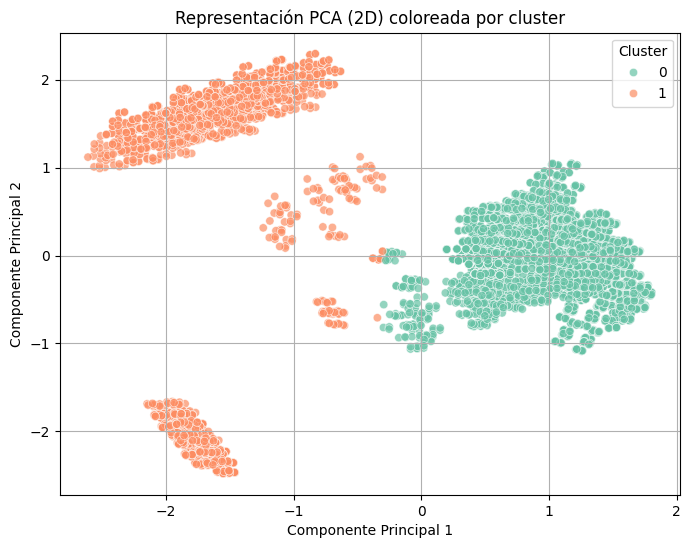

In [54]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Entrenar PCA para representar
pca = PCA(n_components=2)
X_pca_2D = pca.fit_transform(X_encoded)

# Usar un color por cada cluster.

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca_2D)

# Crear DataFrame para graficar
df_vis = pd.DataFrame(X_pca_2D, columns=["PC1", "PC2"])
df_vis["cluster"] = clusters

# Gráfico de dispersión con color por cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="cluster", palette="Set2", alpha=0.7)
plt.title("Representación PCA (2D) coloreada por cluster")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.